<a href="https://colab.research.google.com/github/missjaanii/heartdiseaseprediction/blob/master/heartdisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving HD_Cleveland_Data_Clean.csv to HD_Cleveland_Data_Clean.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df = pd.read_csv('HD_Cleveland_Data_Clean.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,N
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,Y
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,Y
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,N
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,57,0,4,140,241,0,0,123,1,0.2,2,0,7,Y
293,45,1,1,110,264,0,0,132,0,1.2,2,0,7,Y
294,68,1,4,144,193,1,0,141,0,3.4,2,2,7,Y
295,57,1,4,130,131,0,0,115,1,1.2,2,1,7,Y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slop      297 non-null    int64  
 11  ca        297 non-null    int64  
 12  thal      297 non-null    int64  
 13  target    297 non-null    object 
dtypes: float64(1), int64(12), object(1)
memory usage: 32.6+ KB


In [0]:
#How to get statistical informatipn about dataset

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


In [0]:
#Let's try EDA

In [7]:
df['target'].value_counts()

N    160
Y    137
Name: target, dtype: int64

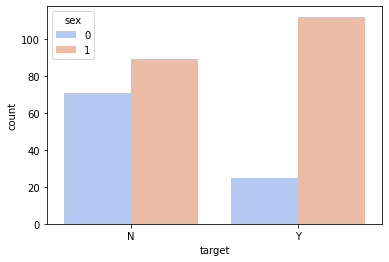

In [8]:
sns.countplot(x='target',data=df, hue='sex',palette='coolwarm') #male = 1 female = 0

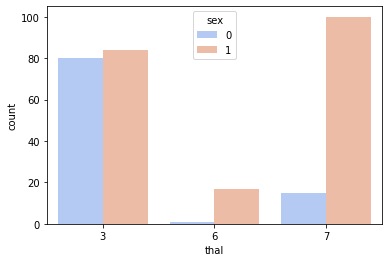

In [9]:
sns.countplot(x='thal',data=df,palette='coolwarm', hue='sex')

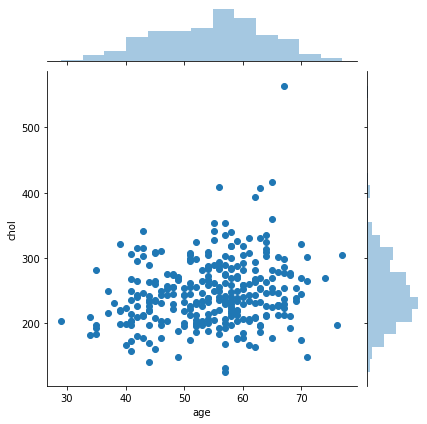

In [10]:
sns.jointplot(x='age',y='chol',data=df)

In [0]:
#Machine Learning section 1, You have to divide the dataset into train and test

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X=df.drop('target',axis=1)
y=df['target'] #key factor should be taken in y

In [0]:
#now divide into test and train

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=101)

In [15]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal
254,76,0,3,140,197,0,1,116,0,1.1,2,0,3
270,59,1,1,134,204,0,0,162,0,0.8,1,2,3
187,69,1,3,140,254,0,2,146,0,2.0,2,3,7
269,71,0,4,112,149,0,0,125,0,1.6,2,0,3
134,55,0,2,135,250,0,2,161,0,1.4,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,59,1,4,164,176,1,2,90,0,1.0,2,2,6
244,47,1,4,110,275,0,2,118,1,1.0,2,1,3
160,77,1,4,125,304,0,2,162,1,0.0,1,3,3
296,57,0,2,130,236,0,2,174,0,0.0,2,1,3


In [16]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal
293,45,1,1,110,264,0,0,132,0,1.2,2,0,7
95,59,1,4,110,239,0,2,142,1,1.2,2,1,7
119,48,1,4,130,256,1,2,150,1,0.0,1,2,7
35,42,1,4,140,226,0,0,178,0,0.0,1,0,3
273,39,0,3,138,220,0,0,152,0,0.0,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,65,0,4,150,225,0,2,114,0,1.0,2,3,7
75,65,0,3,160,360,0,2,151,0,0.8,1,0,3
87,53,0,4,138,234,0,2,160,0,0.0,1,0,3
63,54,0,3,135,304,1,0,170,0,0.0,1,0,3


In [0]:
#Decision trees - We will start with training a single decision tree

In [0]:
#importing decision tree classifier

from sklearn.tree import DecisionTreeClassifier

In [0]:
#creating instance "dtree" of the classifier

dtree = DecisionTreeClassifier()

In [0]:
#fitting to the training data the default parameters are fine at section

In [19]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
#predictions and evolutions

In [0]:
#how to do predictions with tree

predictions = dtree.predict(X_test)

In [0]:
#How to develop classification report and confusion matrix

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [23]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           N       0.77      0.75      0.76        55
           Y       0.70      0.73      0.71        44

    accuracy                           0.74        99
   macro avg       0.73      0.74      0.74        99
weighted avg       0.74      0.74      0.74        99

[[41 14]
 [12 32]]


In [0]:
#Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,N
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,Y
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,Y
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,N
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,57,0,4,140,241,0,0,123,1,0.2,2,0,7,Y
293,45,1,1,110,264,0,0,132,0,1.2,2,0,7,Y
294,68,1,4,144,193,1,0,141,0,3.4,2,2,7,Y
295,57,1,4,130,131,0,0,115,1,1.2,2,1,7,Y


In [0]:
#We need to pass the number of trees in the forest which is n_estimators. Normally we take default value 8-10

In [27]:
#creating instance and fitting the model

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
#let's do the predictions with forest
rfc_pred=rfc.predict(X_test)

In [0]:
#Evaluation Matrix

In [30]:
print(classification_report(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))

              precision    recall  f1-score   support

           N       0.84      0.87      0.86        55
           Y       0.83      0.80      0.81        44

    accuracy                           0.84        99
   macro avg       0.84      0.83      0.84        99
weighted avg       0.84      0.84      0.84        99

[[48  7]
 [ 9 35]]
